<a href="https://colab.research.google.com/github/afroman32/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

In [0]:
import numpy as np
import pandas as pd

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
sales = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])

In [0]:
# mean function
def mean(list):
  m = sum(list)/len(list)
  return m

In [0]:
# variance function
def variance(list):
  size = len(list)
  ave = mean(list)
  total = 0

  for i in range(0, len(list)):
    total += ((list[i] - ave)**2)
  return (total/(len(list)-1))


In [0]:
# Standard Deviation Function
def stand_dev(list):
  return(variance(list)**(1/2))

In [6]:
# find mean of sales
mean(sales)

3052.714285714286

In [7]:
# find variance of sales
variance(sales)

214387.90476190473

In [8]:
# find standard deviation of sales
stand_dev(sales)

463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [81]:
customers = np.array([127, 80, 105, 92, 120, 115, 93])

# create a covariance matrix for sales and customers
covariance = pd.DataFrame(np.cov(sales, customers, ddof = 1), columns = ['customers', 'sales'])
covariance


,customers,sales
0,214387.904762,7604.357143
1,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [10]:
# use my function
print(stand_dev(customers))
print(stand_dev(sales))

17.057326313123664
463.0204150595357


In [57]:
# check with library
print(np.std(customers, ddof = 1))
print(np.std(sales, ddof = 1))


17.057326313123664
463.0204150595357


In [82]:
# combined standard deviation for the denominator
combined_deviation = stand_dev(customers)*stand_dev(sales)

# create coorelation matrix
covariance / combined_deviation

,customers,sales
0,27.144959,0.962834
1,0.962834,0.036839


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [14]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv', index_col = 'Unnamed: 0')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
# remove non-numeric columns
titanic.drop(labels = ['name', 'sex', 'cabin', 'embarked', 'home.dest'], axis = 1, inplace = True)

In [16]:
titanic.head()

,pclass,survived,age,sibsp,parch,ticket,fare,boat,body,has_cabin_number
1,1.0,1.0,29.0000,0.0,0.0,24160,211.3375,2,NaN,1
2,1.0,1.0,0.9167,1.0,2.0,113781,151.5500,11,NaN,1
3,1.0,0.0,2.0000,1.0,2.0,113781,151.5500,NaN,NaN,1
4,1.0,0.0,30.0000,1.0,2.0,113781,151.5500,NaN,135.0,1
5,1.0,0.0,25.0000,1.0,2.0,113781,151.5500,NaN,NaN,1


In [17]:
# variance-covariance matrix
titanic.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [18]:
# coorelation matrix
titanic.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

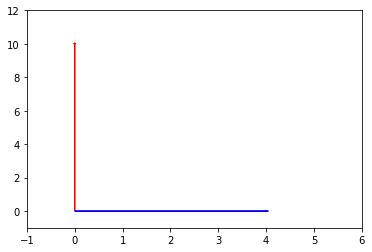

In [19]:
import matplotlib.pyplot as plt
# create vectors
vec_a = [0,10]
vec_b = [4,0]

# graph the vectors
plt.arrow(0,0, vec_a[0], vec_a[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vec_b[0], vec_b[1],head_width=.05, head_length=0.05, color ='blue')

# set limits of the graphs
plt.xlim(-1,6)          
plt.ylim(-1,12)

plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [20]:
a = np.array([[-5],
     [3],
     [7],])

b = np.array([[6],
     [8],
     [2],])

# transpose a so that the vectors can be multiplied
a= a.transpose()

np.dot(a,b)

# not orthogonal because the dot product is not equal to 0

array([[8]])

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [21]:
c= np.array([2, -15, 6, 20])

# squared norm of c
print(np.linalg.norm(c)**2)

# dot product of c and c
print(np.dot(c,c))

# multiplication of transposed c and c
print(np.matmul(c.transpose(), c))
# They are all the same

665.0
665
665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

---



\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + -8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} + 11\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [22]:
f = np.array([4, 12, 11, 9, 2])

# divide f by it's norm to create unit vector
f_unit = f/np.linalg.norm(f)

f_unit

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

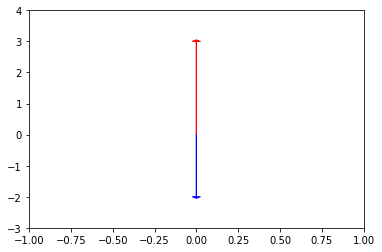

In [23]:
# linearly dependent
vec_1 = [0, 3]
vec_2 = [0, -2]

plt.arrow(0,0, vec_1[0], vec_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vec_2[0], vec_2[1],head_width=.05, head_length=0.05, color ='blue')

plt.xlim(-1, 1)       
plt.ylim(-3, 4)

plt.show()

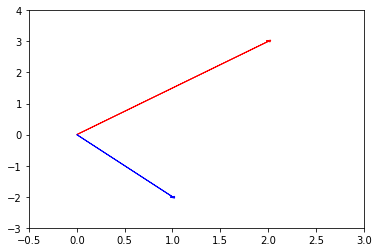

In [24]:
# linearly independent
vec_1 = [2, 3]
vec_2 = [1, -2]

plt.arrow(0,0, vec_1[0], vec_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vec_2[0], vec_2[1],head_width=.05, head_length=0.05, color ='blue')

plt.xlim(-.5, 3)       
plt.ylim(-3, 4)

plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
gh = [[1,2],
      [4, 8]]



The span is $\mathbb{R}^1$

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
lmn = [[1, 2, 3],
       [-1, 0, 7],
       [4, 8, 2]]

The span is $\mathbb{R}^3
$

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



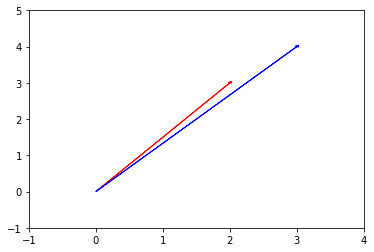

In [27]:
vec_a = [2, 3]
vec_b = [3, 4]

plt.arrow(0,0, vec_a[0], vec_a[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vec_b[0], vec_b[1],head_width=.05, head_length=0.05, color ='blue')

plt.xlim(-1, 4)       
plt.ylim(-1, 5)

plt.show()

## 6.2 What does it mean to form a basis?

Plot linearly independent vectors that span the desired dimension

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

add row 1 to row 2

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 2 & 10 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

add -4 times row 1 to row 3

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 2 & 10 \\
0 & 0  & -10
\end{bmatrix}
\end{align}

scle row 2 by 1/2

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 1 & 5 \\
0 & 0  & -10
\end{bmatrix}
\end{align}

scle row 3 by -1/10

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 1 & 5 \\
0 & 0  & 1
\end{bmatrix}
\end{align}

The rank of P is $\mathbb{R}^3$

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix tells us what dimension is spanned by the column vectors

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

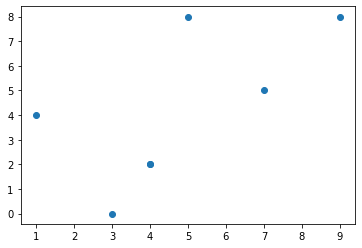

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()